## Homework 3

<strong>Name: </strong>Kennon Stewart

<strong>Email: </strong>ksstewar@umich.edu

In [1]:
# external package import statements
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
# internal package import statements
from constant

In [2]:
college_test_path = "/workspaces/stats_503/homework_3/data/college_test.csv"
college_train_path = "/workspaces/stats_503/homework_3/data/college_train.csv"

college_train = pd.read_csv(COLLEGE_TRAIN_PATH)
college_test = pd.read_csv(COLLEGE_TRAIN_PATH)

In [3]:
X_college_train = college_train.drop(['Name', 'Private'], axis=1)
y_college_train = college_train['Private']

X_college_test = college_test.drop(['Name', 'Private'], axis=1)
y_college_test = college_test['Private']

In [4]:
# initialize the model
model = LogisticRegression(random_state = 9271999)

# fit to the parameters naively
model.fit(X_college_train, y_college_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=9271999)

In [5]:
y_pred = model.predict(X_college_test)

In [6]:
prediction_probabilities = model.predict_proba(X_college_test)

sum = 0
for no_prob, yes_prob in prediction_probabilities:
    sum -= np.log(max(yes_prob, no_prob))
print(sum)

2.902610293810998


In [7]:
def hard_classification(threshold: int, probabilities:np.ndarray) -> np.array:
    results = [0] * len(probabilities)
    for ind in range(len(probabilities)):
        if probabilities[ind][1] >= threshold:
            results[ind] = 1
    return results

In [8]:
def confusion_matrix(y_true:np.array, y_predicted:np.array) -> np.ndarray:
    FP = TP = FN = TN = 0 # initialize the rate values to 0
    y_true = [1 if prediction == "Yes" else 0 for prediction in y_true]
    for prediction, truth in zip(y_predicted, y_true):
        if (prediction == 1) and (truth == 1): # true positive
            TP += 1
        elif (prediction == 1) and (truth == 0): # false positive
            FP += 1
        elif (prediction == 0) and (truth == 0): # true negative
            TN += 1
        else: # false negative
            FN += 1
    conf_matrix = np.array([[TN, FN], [FP, TP]])

    return conf_matrix

In [9]:
def rate_calculations(test_set, classifications) -> tuple:
    # calculate the confusion matrix
    matrix = confusion_matrix(test_set, classifications)

    # assign the TP, FP, TN, FN rates
    TN = int(matrix[0][0])
    FN = int(matrix[0][1])
    FP = int(matrix[1][0])
    TP = int(matrix[1][1])

    # status check
    # print(f"TP: {TP}")
    # print(f"FP: {FP}")
    # print(f"TN: {TN}")
    # print(f"FN: {FN}")

    # calculate TPR
    TPR = TP / max((TP + FN), 1)
    # calculate FPR
    FPR = FP / max((FP + TN), 1)
    # calculate TNR
    TNR = TN / max((TN + FP), 1)
    # calculate FNR
    FNR = FN / max((FN + TN), 1)

    return (TPR, FPR, TNR, FNR)

In [10]:
def simulate_thresholds(threshold, prediction_probabilities, y_test):   
    # initialize the range of thresholds
    thresholds = np.linspace(0, 1, 101)
    results = list()
    for threshold in thresholds:
        # compute the classifications
        classifications = hard_classification(threshold, prediction_probabilities)

        # calculate the prediction rate results
        TPR, FPR, TNR, FNR = rate_calculations(y_test, classifications)

        # add to the results
        results.append((FPR, TPR))
        
    # return the results
    return (results)

simulation_results = simulate_thresholds(y_college_test, prediction_probabilities, y_college_test)

In [11]:
fpr, tpr = zip(*simulation_results)

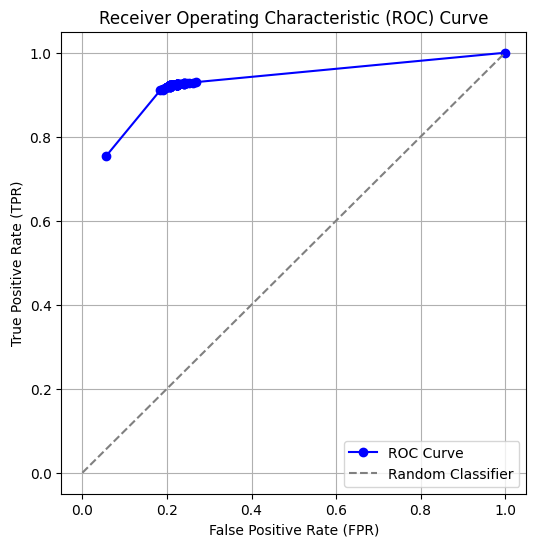

In [12]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='blue', label="ROC Curve")

# Plot the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()

# Show plot
plt.show()